# Jawaban 1

# Import Libraries dan Split Data

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.utils import to_categorical

4423680/4422102 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


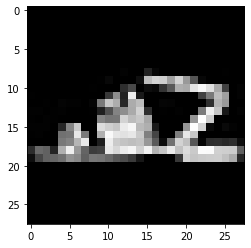

In [ ]:
(feature_train, label_train), (feature_test, label_test) = fashion_mnist.load_data()

print("Train", feature_train.shape, label_train.shape)
print("Test", feature_test.shape, label_test.shape)

plt.imshow(feature_train[1250], cmap=plt.get_cmap('gray'))

In [ ]:
feature_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# Feature Engineering

In [ ]:
feature_train = feature_train.reshape((feature_train.shape[0], 28, 28, 1))
feature_test = feature_test.reshape((feature_test.shape[0], 28, 28, 1))

In [ ]:
print(feature_train.shape)

(60000, 28, 28, 1)


In [ ]:
feature_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [ ]:
label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

print(label_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
feature_train = feature_train.astype('float32')
feature_test = feature_test.astype('float32')

feature_train = feature_train / 255.0
feature_test = feature_test / 255.0

In [ ]:
feature_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# Neural Network

In [ ]:
base_model = Sequential()

base_model.add(Flatten(input_shape=(28, 28, 1)))
base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
base_model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function # categorical_crossentropy untuk klasifikasi

base_model.summary()

history = base_model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5333 - accuracy: 0.8118 - val_loss: 0.4869 - val_accuracy: 0.8226
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3955 - accuracy: 0.8583 - val_loss: 0.4064 - val_accuracy: 0.8558
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3602 - accurac

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.533343,0.811817,0.486935,0.8226,0
1,0.395500,0.858250,0.406413,0.8558,1
2,0.360188,0.869233,0.398110,0.8516,2
3,0.335282,0.877550,0.374265,0.8647,3
4,0.321076,0.882933,0.367181,0.8696,4
5,0.305714,0.888367,0.361498,0.8706,5
6,0.293569,0.891550,0.368423,0.8674,6
7,0.284214,0.895150,0.345352,0.8709,7
8,0.275088,0.897733,0.396645,0.8573,8
9,0.266856,0.902883,0.351856,0.8725,9


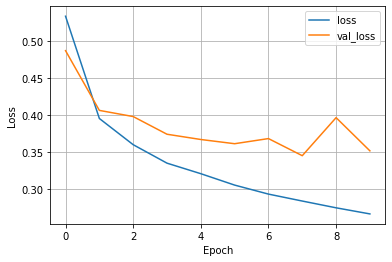

In [ ]:
plot_loss(history) # epoch vs loss graph

In [ ]:
loss, accuracy = base_model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 0.3519 - accuracy: 0.8725
Test accuracy: 0.8725000023841858
Test loss: 0.3518558442592621


# CNN

In [ ]:
# Adapted from: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3

model.add(MaxPooling2D((2, 2))) # Pooling

model.add(Flatten()) # Flatten hasil output

# Fully connected layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

model.summary()

history_cnn = model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4452 - accuracy: 0.8390 - val_loss: 

In [ ]:
loss, accuracy = model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 0.2801 - accuracy: 0.9108
Test accuracy: 0.9107999801635742
Test loss: 0.28014281392097473


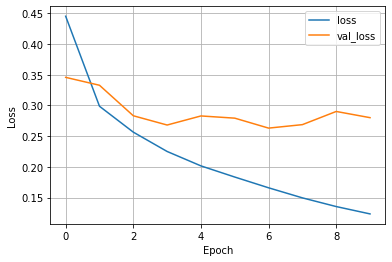

In [ ]:
plot_loss(history_cnn)

# Kesimpulan

Akurasi didapat lebih tinggi dan loss function lebih rendah dengan menggunakan CNN. Dimana dilakukan convolution(32 filter, dengan kernel 3x3 dan activation menggunakan relu) sebanyak 1 kali, dan max pooling sebanyak 1 kali.

Dan FC layer menggunakan 1 hidden layer(100 neutron, activation relu) dan output layer(10 neutron untuk 10 kategori, activation softmax untuk output presentase). Dengan hasil:

loss: 0.3131 - accuracy: 0.9053

Test accuracy: 0.9053000211715698

Test loss: 0.31306591629981995

# Jawaban 2

**Tambahan 1 Convolution 1 Max Pool(Fashion)**

In [ ]:
# Adapted from: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

 # Convolution, 32 filters, masing-masing dengan kernel 3x3

model.add(MaxPooling2D((2, 2))) # Pooling

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten()) # Flatten hasil output

# Fully connected layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

model.summary()

history_cnn = model.fit(feature_train, label_train, batch_size=32, validation_data=(feature_test, label_test), epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
loss, accuracy = model.evaluate(feature_test,  label_test, verbose=2)

print("Test accuracy:", accuracy)
print("Test loss:", loss)

313/313 - 1s - loss: 0.2904 - accuracy: 0.9066
Test accuracy: 0.9065999984741211
Test loss: 0.29040583968162537


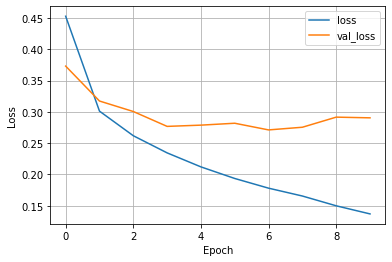

In [ ]:
plot_loss(history_cnn)

**Tambahan 1 Convolution 1 Max Pool(Numbers)**

11493376/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


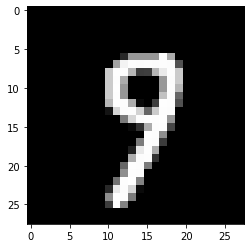

In [ ]:
(feature_train2, label_train2), (feature_test2, label_test2) = mnist.load_data()

print("Train", feature_train2.shape, label_train2.shape)
print("Test", feature_test2.shape, label_test2.shape)

plt.imshow(feature_train2[1250], cmap=plt.get_cmap('gray'))

In [ ]:
feature_train2 = feature_train2.reshape((feature_train2.shape[0], 28, 28, 1))
feature_test2 = feature_test2.reshape((feature_test2.shape[0], 28, 28, 1))

In [ ]:
label_train2 = to_categorical(label_train2)
label_test2 = to_categorical(label_test2)

print(label_train2)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
feature_train2 = feature_train2.astype('float32')
feature_test2 = feature_test2.astype('float32')

feature_train2 = feature_train2 / 255.0
feature_test2 = feature_test2 / 255.0

In [ ]:
# Adapted from: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))

 # Convolution, 32 filters, masing-masing dengan kernel 3x3

model2.add(MaxPooling2D((2, 2))) # Pooling

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten()) # Flatten hasil output

# Fully connected layer
model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
model2.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

model2.summary()

history_cnn2 = model2.fit(feature_train2, label_train2, batch_size=32, validation_data=(feature_test2, label_test2), epochs=10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
loss2, accuracy2 = model2.evaluate(feature_test2,  label_test2, verbose=2)

print("Test accuracy:", accuracy2)
print("Test loss:", loss2)

313/313 - 1s - loss: 0.0374 - accuracy: 0.9894
Test accuracy: 0.9894000291824341
Test loss: 0.03743196278810501


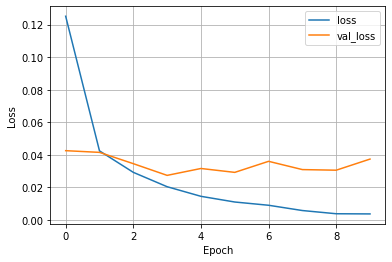

In [ ]:
plot_loss(history_cnn2)

Kesimpulan

Untuk image Fashion, setelah dilakukan penambahan ternyata akurasinya berkurang, walaupun angka loss nya juga berkurang. Sementara untuk image Numbers, untuk akurasi naik sedikit begitu pula dengan angka loss nya sedikit menurun.